**<font color = yellow size=6>实验六：支持向量机</font>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cvxopt
from cvxopt import matrix
from cvxopt import solvers

**<font color = white size=4>第一部分:函数介绍</font>**

二次规划问题是形式如下的一类最优化问题：
$$
\begin{align}
\min_x \quad  &\frac{1}{2}x^TPx+q^Tx \\
s.t. \quad  &Gx\leq h \\
      &Ax=b
\end{align}
$$
对于这一类问题可以使用[cvxopt](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)库的solvers.qp()函数进行求解。

以下是一个例子（参考[Solving a quadratic program](https://cvxopt.org/examples/tutorial/qp.html)）:
$$
\begin{align}
\min_x \quad  &2x_1^2+x_2^2+x_1x_2+x_1+x_2 \\
s.t. \quad  &x_1\geq 0 \\
      &x_2\geq 0 \\
      &x_1+x_2=1
\end{align}
$$
为了使用solvers.qp()函数，我们需要知道在该二次规划问题中的$P,q,G,h,A,b$矩阵分别是什么。
在该优化问题中，

* $P:=\begin{bmatrix}
    4 & 1 \\ 1 & 2
   \end{bmatrix}$,
* $q:=\begin{bmatrix}
    1 \\ 1
   \end{bmatrix}$,
* $G:=\begin{bmatrix}
    -1 & 0 \\ 0 & -1
   \end{bmatrix}$,
* $h:=\begin{bmatrix}
    0 \\ 0
   \end{bmatrix}$,
* $A:=\begin{bmatrix}
    1 & 1
   \end{bmatrix}$,
* $b:=\begin{bmatrix}
    1
   \end{bmatrix}$,
   
把这些参数送入solvers.qp()函数中即可求出解。

In [2]:
# Tips1: cvxopt库中的matrix只接受double类型的数据
# Tips2: matrix使用列表作为参数创建矩阵和numpy.array使用列表作为参数创建矩阵是不同的
# print(matrix([[1.0, 1.0]]))
# print(np.array([[1.0, 1.0]]))
# print(matrix(np.array([[1.0, 1.0]])))
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0,1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)
print(sol['x'])
#t=np.mat([[2,1], [2, 1], [2, 1]])

#print(t)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]



**<font color = blue size=4>第二部分:实验任务</font>**

1.线性可分支持向量机与硬间隔最大化

<span style="color:white">1) 读入数据集'dataset1.csv',把数据类型都转换成np.double类型，并画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色。</span>

Text(0, 0.5, 'x2')

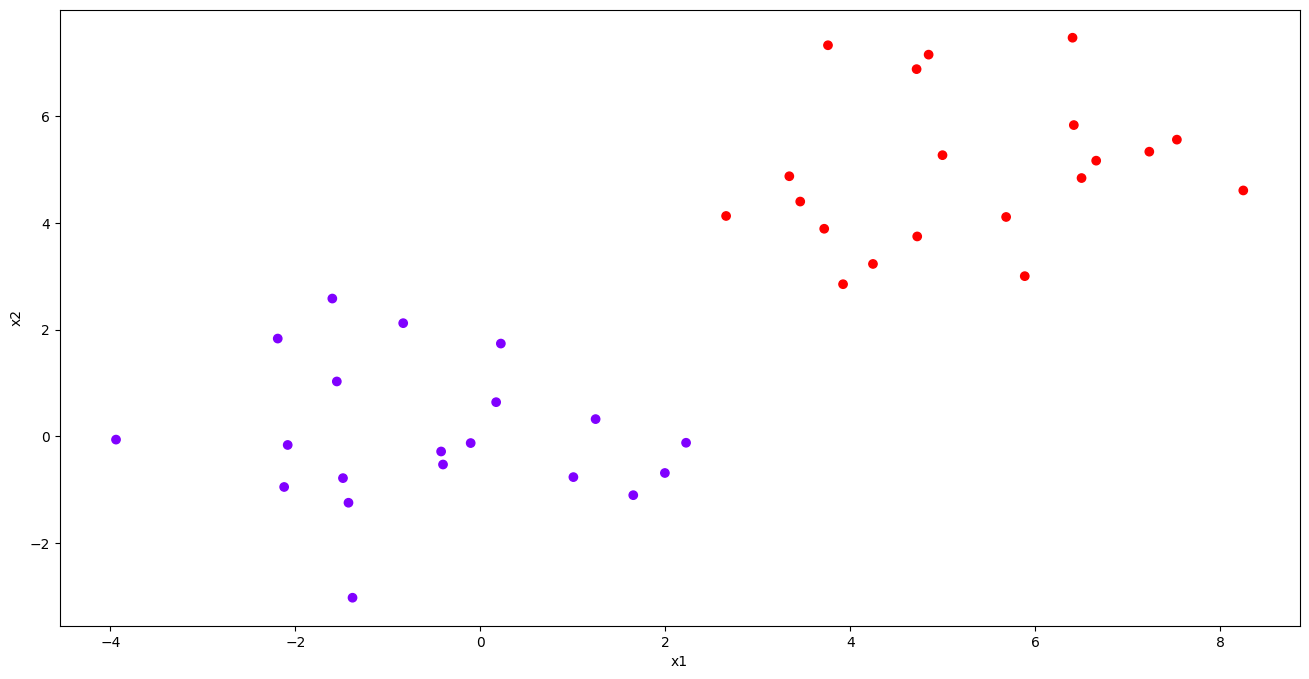

In [3]:
# ---- Your code here ----
dataset1=pd.read_csv("dataset1.csv")
data1=np.double(dataset1)
x_1=data1[ :, 0]
x2=data1[ : , 1]
y=data1[ : ,-1]
plt.figure(figsize=(16,8))
plt.scatter(x_1, x2,c=y.flatten(), cmap='rainbow')       
# c=list，设置cmap，根据label不一样，设置不一样的颜色
# c:色彩或颜色序列   camp:colormap（颜色表）
plt.xlabel('x1')
plt.ylabel('x2')


<span style="color:white">2) 求解如下对偶问题（参考课件）：</span>
$$
\begin{align}
\min_\alpha \quad  &\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_j\pmb{x}_i^T\pmb{x}_j-\sum_{i=1}^m\alpha_i \\
s.t. \quad  &\sum_{i=1}^m\alpha_iy_i=0 \\
      &\pmb{\alpha}\geq \pmb{0}
\end{align}
$$

这个优化问题是一个二次规划问题。
* $P是一个m\times m的矩阵，其中P_{ij}=y_iy_j\pmb{x}_i^T\pmb{x}_j$,
* $q是一个m\times 1的所有值都为-1的列向量，即q:=\begin{bmatrix}
    -1 & -1 & \cdots & -1
   \end{bmatrix}^T$,
* $G:=\begin{bmatrix}
    -1 & 0 & \cdots & 0 \\
    0 & -1 & \cdots & 0 \\
   \vdots & \vdots & \ddots &0 \\
   0 & 0 & 0 & -1
   \end{bmatrix}_{m\times m}=-\pmb{I},\pmb{I}为单位矩阵,$
* $h是一个m\times 1的零向量,即h:=\begin{bmatrix}
    0 & 0 & \cdots & 0
   \end{bmatrix}^T$,
* $A:=\begin{bmatrix}
    y_1 & y_2 & \cdots & y_m
   \end{bmatrix}^T$,
* $b:=\begin{bmatrix}
    0
   \end{bmatrix},一个标量$
   
<span style="color:white">把上述参数送入求解器solvers.qp()中即可得到最优解$\alpha^*$</span>。 
 
附：$P$矩阵的一个计算方法：
设$X=\begin{bmatrix}
    x_{11} & x_{12} \\
    x_{21} & x_{22} \\
    \vdots & \vdots \\
    x_{m1} & x_{m2}
   \end{bmatrix}$,
   $Y=\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m}
   \end{bmatrix}$,
   
计算$X'=\begin{bmatrix}
    x_{11}y_1 & x_{12}y_1 \\
    x_{21}y_2 & x_{22}y_2 \\
    \vdots & \vdots \\
    x_{m1}y_m & x_{m2}y_m
   \end{bmatrix}=X*Y(注意这里是星乘)$
   
则$P=X'X'^T$。

In [4]:
# ---- Your code here ----
#如果求解报错可以尝试在solvers.qp()中添加参数kktsolver='ldl'
row=x_1.shape[0]
col=data1.shape[1]
q=-np.ones((row, 1))
h=np.zeros((row, 1))
G=-np.eye(row)  #-0对后续是否有影响？
#A=y.transpose()
#A=A.reshape((1,row))        #注意维度！一维变二维！
A=y.reshape(1,row)
X=np.c_[x_1,x2]
X_1=X*(y.reshape(row, 1))
#print(X_1.shape)
P=X_1.dot(X_1.transpose())
q=matrix(q)
h=matrix(h)
P=matrix(P)
G=matrix(G)
A=matrix(A)
b=matrix(0.)
sol=solvers.qp(P, q, G, h, A, b, kktsolver='ldl')
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -5.2553e+00 -9.0147e+00  1e+02  1e+01  2e+00
 1: -4.9265e+00 -1.9551e+00  2e+01  2e+00  3e-01
 2: -1.5759e-01 -3.1831e-01  7e-01  4e-02  7e-03
 3: -1.3147e-01 -1.9706e-01  7e-02  1e-16  1e-15
 4: -1.7378e-01 -1.8099e-01  7e-03  1e-16  1e-15
 5: -1.7979e-01 -1.8010e-01  3e-04  7e-17  1e-15
 6: -1.8003e-01 -1.8003e-01  3e-06  1e-16  1e-15
 7: -1.8003e-01 -1.8003e-01  3e-08  6e-17  1e-15
Optimal solution found.
[ 1.61e-09]
[ 5.12e-02]
[ 2.56e-10]
[ 1.03e-09]
[ 2.50e-10]
[ 4.43e-10]
[ 1.16e-09]
[ 2.18e-10]
[ 2.61e-10]
[ 2.92e-10]
[ 3.87e-10]
[ 6.08e-09]
[ 1.37e-09]
[ 3.58e-10]
[ 4.21e-10]
[ 4.86e-10]
[ 3.68e-10]
[ 1.29e-01]
[ 2.97e-10]
[ 4.50e-10]
[ 6.52e-10]
[ 3.53e-09]
[ 4.81e-10]
[ 1.58e-09]
[ 3.51e-10]
[ 1.80e-01]
[ 3.07e-10]
[ 5.06e-10]
[ 8.12e-10]
[ 3.97e-10]
[ 2.12e-08]
[ 2.07e-10]
[ 2.33e-10]
[ 2.26e-09]
[ 3.96e-10]
[ 6.20e-10]
[ 4.16e-10]
[ 7.28e-10]
[ 4.78e-10]
[ 3.15e-10]



<span style="color:white">3) 求出$\pmb{\omega}^*=\sum_{i=1}^m\alpha_i^*y_i\pmb{x}_i$和$b^*=y_j-\pmb{\omega}^{*T}\pmb{x_j}$, 其中$j$为$\alpha^*$中的一个正分量$\alpha_j^*>0$的下标。注意：由于求解器求出来的是一个近似解，所以$\alpha^*$中很多实际上为0的分量会略大于0，这时候可以设置一个阈值把非常靠近0的那些分量筛去，再从剩下的分量中选取一个正分量来计算$b^*$,或者也可以直接取$\alpha^*$中最大的分量来计算$b^*$。</span>

In [5]:
# ---- Your code here ----
alpha=np.array(sol['x'])
y=(np.array(y)).reshape(row,1)
X=np.array(X).reshape(row,col-1)
w1=sum(alpha*y*X[: ,0:1])#0:1!!!!   碰到无法解释的时候注意索引维度！如果直接给一个值，会直接变成一维！
w2=sum(alpha*y*X[: ,1:2])
w=np.c_[w1,w2]      
print(w)        #w 为1*2， x为40*2， 抽出来的x为2*1
index=np.argmax(alpha)
print(index)
beta=0.000001      #确定一个阈值，防止所有的点被认为是支持向量
index2=[np.where(alpha==x) for x in alpha if x>beta]    #找出所有大于0的alpha对应的index
sup=[]
for i in range(len(index2)):
    sup.append(int(index2[i][0]))       #由于是二维，所以要降维
b=y[index]-w.dot(X[index, 0:2].transpose())     #求出b
print(b)
print(sup)

[[0.40821121 0.43979838]]
25
[-1.85568198]
[1, 17, 25]


<span style="color:white">4) 画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色，再为支持向量（训练数据中$\alpha_j^*>0$的对应的样本）标上不同的颜色，并画出决策边界$\pmb{\omega}^{*T}\pmb{x}+b=0$和间隔边界$\pmb{\omega}^{*T}\pmb{x}+b=1$与$\pmb{\omega}^{*T}\pmb{x}+b=-1$。</span>

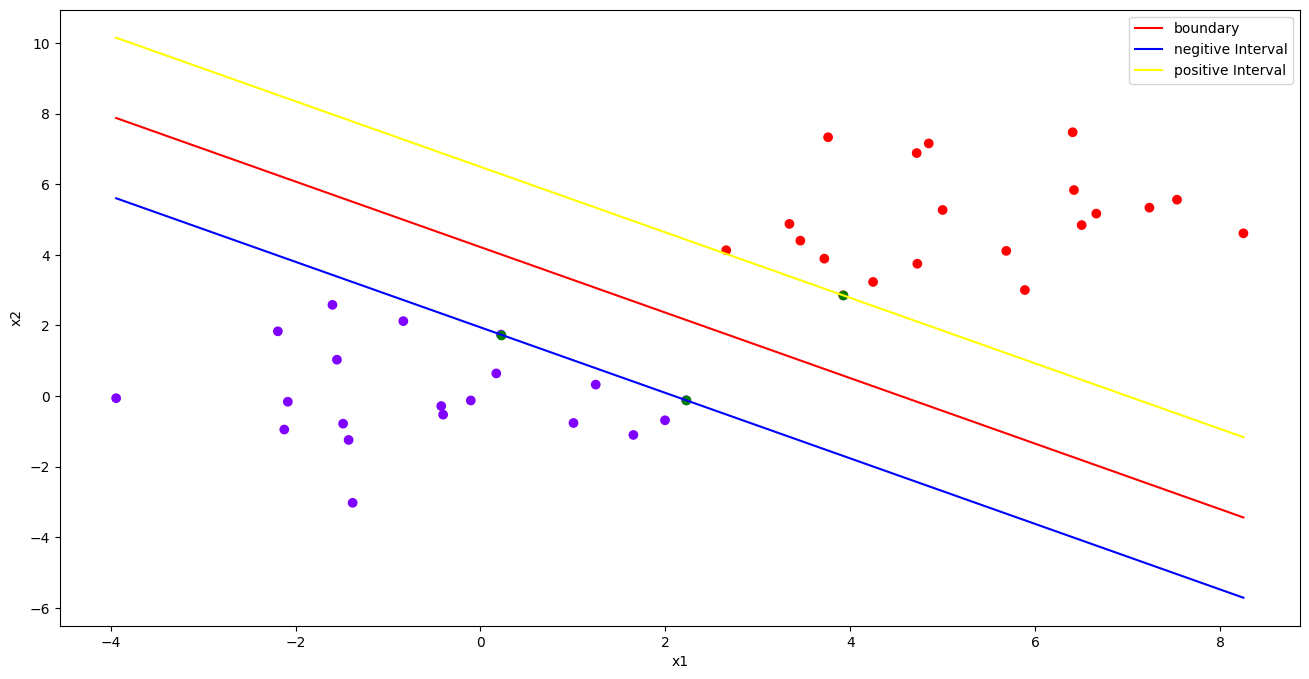

In [6]:
# ---- Your code here ----
px1=np.linspace(x_1.min(), x_1.max())
px2=(-b-w[0][0]*px1)/w[0][1]        #w为二维数据，所以要两层访问！
pxneg=(-1-b-w[0][0]*px1)/w[0][1]        #negitive的x
pxpos=(1-b-w[0][0]*px1)/w[0][1]         #positive的x
plt.figure(figsize=(16,8))                  
plt.scatter(x_1, x2,c=y.flatten(), cmap='rainbow') #以两种不同的颜色标出x1，x2
plt.scatter(x_1[sup], x2[sup], c='green')     #以绿色标出支持向量
# c=list，设置cmap，根据label不一样，设置不一样的颜色
# c:色彩或颜色序列   camp:colormap（颜色表）
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(px1, px2, 'r',label='boundary')
plt.plot(px1, pxneg, 'blue',label='negitive Interval')
plt.plot(px1, pxpos, 'yellow',label='positive Interval')
plt.legend()
# 此处有个点没标到，原因是beta的设定



2.线性支持向量机与软间隔最大化

<span style="color:white">1) 读入数据集'dataset2.csv',把数据类型都转换成np.double类型，并画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色。</span>

Text(0, 0.5, 'x2')

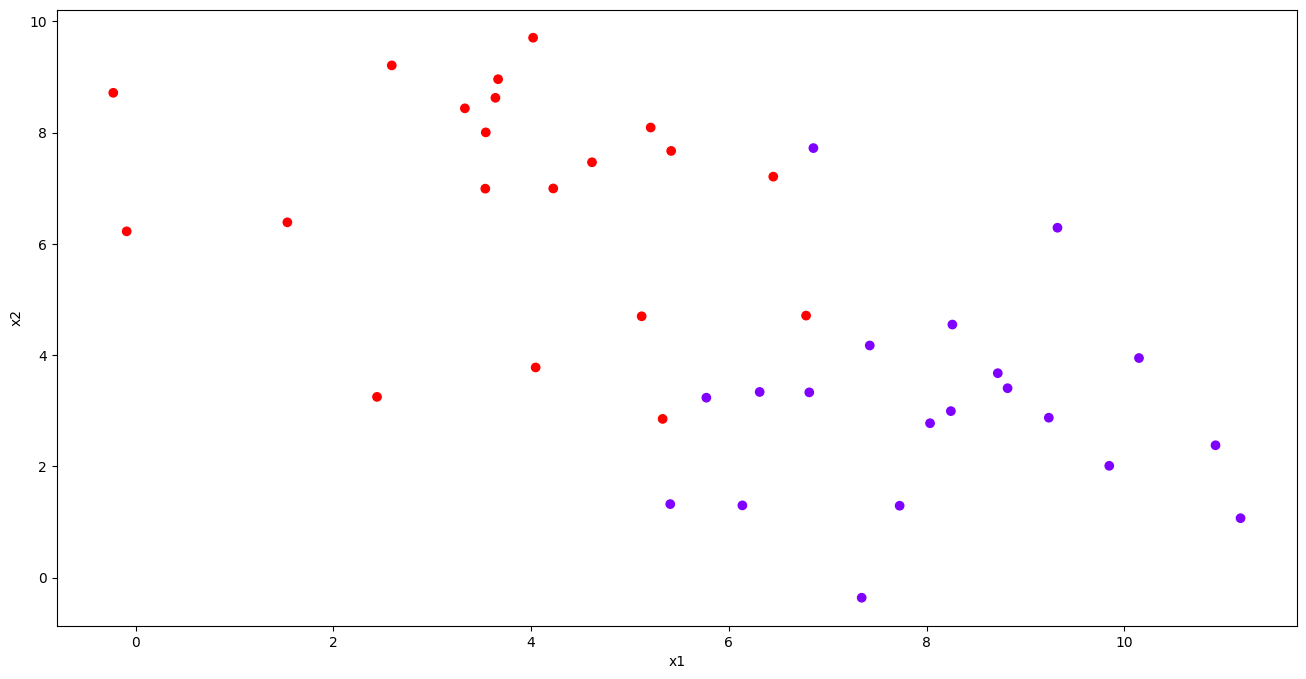

In [7]:
# ---- Your code here ----
dataset2=pd.read_csv("dataset2.csv")
data2=np.double(dataset2)
x_1=data2[ :, 0]
x_2=data2[ : , 1]
y_2=data2[ : ,-1]
plt.figure(figsize=(16,8))
plt.scatter(x_1, x_2,c=y_2.flatten(), cmap='rainbow')       
# c=list，设置cmap，根据label不一样，设置不一样的颜色
# c:色彩或颜色序列   camp:colormap（颜色表）
plt.xlabel('x1')
plt.ylabel('x2')




<span style="color:white">2) 选择一个参数C，求解如下对偶问题（参考课件）：</span>
$$
\begin{align}
\min_\alpha \quad  &\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_j\pmb{x}_i^T\pmb{x}_j-\sum_{i=1}^m\alpha_i \\
s.t. \quad  &\sum_{i=1}^m\alpha_iy_i=0 \\
      &\pmb{0}\leq \pmb{\alpha}\leq C 
\end{align}
$$
* $G:=\begin{bmatrix}
    -1 & 0 & \cdots & 0 \\
    0 & -1 & \cdots & 0 \\
   \vdots & \vdots & \ddots &0 \\
   0 & 0 & 0 & -1 \\
   1 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
   \vdots & \vdots & \ddots &0 \\
   0 & 0 & 0 & 1
   \end{bmatrix}_{2m\times m}=\begin{bmatrix}
    -\pmb{I} \\
    \pmb{I}
   \end{bmatrix},\pmb{I}为单位矩阵,$
* $h:=\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    0 \\
    C \\
    C \\
    \vdots \\
    C
   \end{bmatrix}_{2m\times 1}, 即一个m\times 1的零列向量与一个m\times 1的分量全为C的列向量上下拼接$,
* $P,q,A,b$与硬间隔优化问题中的矩阵相同。

In [8]:
# ---- Your code here ----
#求出对应参数！
G=np.r_[-np.eye(x_1.shape[0]),np.eye(x_1.shape[0])]
#print(G.shape)
C=0.1       #惩罚参数
h=np.r_[np.zeros((x_1.shape[0], 1)), np.full((x_1.shape[0], 1), C)]
#print(h)


q=-np.ones((x_1.shape[0], 1))
A=y_2.transpose()
A=A.reshape((1,x_1.shape[0]))        #注意维度！一维变二维！
X=np.c_[x_1,x_2]
X_1=X*(y_2.reshape(x_1.shape[0], 1))
#print(X_1.shape)
P=X_1.dot(X_1.transpose())      #注意此处要用cvxopt自带的matrix，不能用numpy的matrix
q=matrix(q)
h=matrix(h)
P=matrix(P)
G=matrix(G)
A=matrix(A)
b=matrix(0.)        #直接用matrix去定义，不要用array转
sol=solvers.qp(P, q, G, h, A, b)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -6.5283e+00 -6.9444e+00  2e+02  1e+01  2e-14
 1: -1.1947e+00 -6.3749e+00  1e+01  6e-01  4e-14
 2: -7.5919e-01 -2.8370e+00  3e+00  8e-02  6e-15
 3: -7.6127e-01 -1.0578e+00  3e-01  9e-03  3e-15
 4: -8.3925e-01 -9.0868e-01  8e-02  2e-03  2e-15
 5: -8.5730e-01 -8.6562e-01  9e-03  1e-04  4e-15
 6: -8.6018e-01 -8.6152e-01  1e-03  2e-05  4e-15
 7: -8.6078e-01 -8.6081e-01  3e-05  4e-07  4e-15
 8: -8.6079e-01 -8.6079e-01  3e-07  4e-09  4e-15
Optimal solution found.
[ 7.17e-10]
[ 4.33e-02]
[ 7.63e-10]
[ 1.00e-01]
[ 1.17e-09]
[ 6.72e-02]
[ 1.00e-01]
[ 4.90e-09]
[ 2.31e-09]
[ 1.35e-09]
[ 1.00e-01]
[ 1.00e-01]
[ 3.05e-09]
[ 1.47e-08]
[ 1.63e-09]
[ 1.00e-01]
[ 4.10e-09]
[ 7.52e-10]
[ 1.48e-09]
[ 1.27e-09]
[ 1.58e-08]
[ 2.46e-08]
[ 1.00e-01]
[ 1.00e-01]
[ 7.87e-10]
[ 4.05e-09]
[ 8.17e-10]
[ 9.92e-09]
[ 7.44e-10]
[ 8.91e-10]
[ 1.04e-02]
[ 1.37e-09]
[ 2.23e-09]
[ 1.00e-01]
[ 4.37e-09]
[ 1.00e-01]
[ 1.38e-07]
[ 1.32e-08]
[ 2.03e-08]
[ 1.34e-09]



<span style="color:white">3) 求出$\pmb{\omega}^*=\sum_{i=1}^m\alpha_i^*y_i\pmb{x}_i$和$b^*=y_j-\pmb{\omega}^{*T}\pmb{x_j}$, 其中$j$为$\alpha^*$中的一个正分量$0<\alpha_j^*<C$的下标。与硬间隔优化问题同理，应该筛掉非常接近0和非常接近$C$的分量。</span>

In [9]:
# ---- Your code here ----
from random import choice
alpha_2=np.array(sol['x'])
y_2=y_2.reshape(x_1.shape[0], 1)        #注意reshape
X=np.array(X)       
w1=sum(alpha_2*y_2*X[: ,0:1])#0:1!!!!   碰到无法解释的时候注意索引维度！如果直接给一个值，会直接变成一维！
w2=sum(alpha_2*y_2*X[: ,1:2])
w=np.c_[w1,w2]
print(w)        #w 为1*2， x为40*2， 抽出来的x为2*1
beta=0.02       #阈值，取中位数并不合适，因为可能因为数据偏向某一方导致误差
index=[np.where(alpha_2==x) for x in alpha_2 if ((x-0>beta) and (C-x>beta))]
index=choice(index)     #从合适的index中随机选取一个index
print(index[0])            
b=y_2[index[0]]-w.dot(X[index[0], :].transpose())   #取出对应某个大于0的alpha对应的下标j，及其对应的数据
print(b)

index_2=[np.where(alpha_2==x) for x in alpha_2 if x>beta]    #找出所有大于0的alpha对应的index
sup=[]
for i in range(len(index_2)):
    sup.append(int(index_2[i][0]))       #由于是二维，所以要降维



[[-0.46184645  0.32690905]]
[1]
[[1.0652783]]


<span style="color:white">4) 画出数据集的散点图，给正样本（y为+1）和负样本（y为-1）分别标上不同的颜色，再为支持向量（训练数据中$\alpha_j^*>0$的对应的样本）标上不同的颜色，并画出决策边界$\pmb{\omega}^{*T}\pmb{x}+b=0$和间隔边界$\pmb{\omega}^{*T}\pmb{x}+b=1$与$\pmb{\omega}^{*T}\pmb{x}+b=-1$。</span>

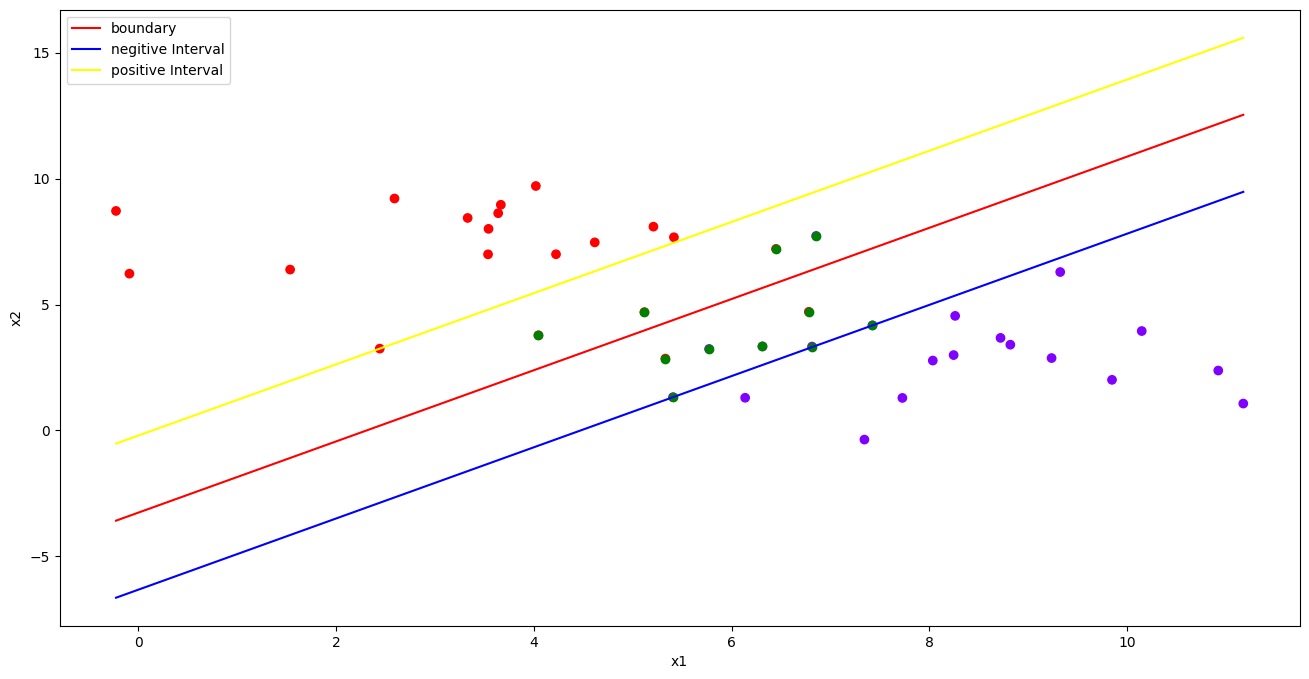

In [10]:
# ---- Your code here ----
px1=np.linspace(x_1.min(), x_1.max())       #px1维度为（50，）
px2=(-b-w[0][0]*px1)/w[0][1]            #此处px2维度为（1，50）,所以后续要平铺开
pxneg=(-1-b-w[0][0]*px1)/w[0][1]           #w维度为（1，2），二维数据！所以要两层访问！！
pxpos=(1-b-w[0][0]*px1)/w[0][1]
plt.figure(figsize=(16,8))
plt.scatter(x_1, x_2,c=y_2.flatten(), cmap='rainbow') 
plt.scatter(x_1[sup], x_2[sup],c='green')        #画出支持向量，如果需要，可以去掉前面的注释再运行一次！
# c=list，设置cmap，根据label不一样，设置不一样的颜色
# c:色彩或颜色序列   camp:colormap（颜色表）
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(px1, px2.flatten(), 'r',label='boundary')      
plt.plot(px1, pxneg.flatten(), 'blue',label='negitive Interval')
plt.plot(px1, pxpos.flatten(), 'yellow',label='positive Interval')
plt.legend()







3.非线性支持向量机与核函数

[Raisin Dataset](https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset)是一个葡萄干的数据集，总共有900个样本，每个样本包含7个(都是连续的)特征以及1个标签，每个标签只有两种可能取值。本次实验已经按照8：2的比例划分成了训练数据集'Raisin_train.csv'以及测试数据集'Raisin_test.csv'，且每个数据集都已经做了特征归一化处理以及把标签的值替换成了+1和-1。

<span style="color:white">1) 读入训练数据集'Raisin_train.csv',把数据类型都转换成np.double类型。</span>

In [17]:
# ---- Your code here ----
from numpy import *
from time import sleep
Raisin_train=pd.read_csv("Raisin_train.csv")
Raisin_test=pd.read_csv("Raisin_test.csv")
train=np.double(Raisin_train)
test=np.double(Raisin_test)
x_3=train[: , :-1]      #(720,7)
y_3=train[: , -1]       #(720,1)



<span style="color:white">2) 选择一个核函数$K(\pmb{x},\pmb{z})$以及参数C，求解如下对偶问题（参考课件）：</span>
$$
\begin{align}
\min_\alpha\quad   &\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jK(\pmb{x}_i,\pmb{x}_j)-\sum_{i=1}^m\alpha_i \\
s.t. \quad  &\sum_{i=1}^m\alpha_iy_i=0 \\
      &\pmb{0}\leq \pmb{\alpha}\leq C 
\end{align}
$$

相较于软间隔最大化的优化问题，该优化问题仅需要对矩阵$P$做改动。
从以下常用的核函数中选择一个作为该优化问题中的$K$（参数自己进行调整）：
* 线性核：$K(\pmb{x},\pmb{z})=\pmb{x}^T\pmb{z}$
* 多项式核：$K(\pmb{x},\pmb{z})=(\pmb{x}^T\pmb{z}+1)^p$
* 高斯核：$K(\pmb{x},\pmb{z})=exp(-\frac{\parallel \pmb{x}-\pmb{z} \parallel^2}{2\sigma^2})$
* 拉普拉斯核：$K(\pmb{x},\pmb{z})=exp(-\frac{\parallel \pmb{x}-\pmb{z} \parallel}{\sigma})$
* Sigmoid核：$K(\pmb{x},\pmb{z})=tanh(\beta\pmb{x}^T\pmb{z}+\theta)$

则$P是一个m\times m的矩阵，其中P_{ij}=y_iy_jK(\pmb{x_i},\pmb{x_j})$。

In [18]:
# ---- Your code here ----
def kernelTrans(X, A, kTup):
    """
    Function：   核转换函数

    Input：      X：数据集
                A：某一行数据
                kTup：核函数信息

    Output： K：计算出的核向量
    """ 
    #获取数据集行列数
    m, n = shape(X)
    #初始化列向量
    K = mat(zeros((m, 1)))
    #根据键值选择相应核函数
    #lin表示的是线性核函数
    if kTup[0] == 'lin': K = X * A.T
    #rbf表示径向基核函数
    elif kTup[0] == 'rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            deltaRow=deltaRow.reshape(1,n)
            K[j] = deltaRow.dot(deltaRow.T)
        #对矩阵元素展开计算，而不像在MATLAB中一样计算矩阵的逆
        K =  exp(K/(-1*kTup[1]**2))
    #如果无法识别，就报错
    else: raise NameError('Houston We Have a Problem -- That Kernel is not recognized')
    #返回计算出的核向量
    return K
#求二次规划参数
G=np.r_[-np.eye(x_3.shape[0]),np.eye(x_3.shape[0])]
#print(G.shape)
#惩罚参数
C=0.1
h=np.r_[np.zeros((x_3.shape[0], 1)), np.full((x_3.shape[0], 1), C)]
#print(h)


q=-np.ones((x_3.shape[0], 1))
A=y_3.transpose()
A=A.reshape((1,x_3.shape[0]))        #注意维度！一维变二维！
# 核函数应用！
newx_3=np.ones((1,x_3.shape[0]))        #新增一行‘1’行，后续删除！
for i in range(x_3.shape[0]):
    newrow=kernelTrans(x_3, x_3[i, :], ('lin',10))       #alpha选1，后续测试用10
    newx_3=np.r_[newx_3, newrow.T]
newx_3=np.delete(newx_3,0, axis=0)
#print(newx_3)       #对角必为1
X_1=newx_3*(y_3.reshape(newx_3.shape[0], 1))
#print(X_1.shape)

#需要对X_1做一步变换得到p
P=X_1.dot(X_1.transpose())
q=cvxopt.matrix(q)
h=cvxopt.matrix(h)
P=cvxopt.matrix(P)
G=cvxopt.matrix(G)
A=cvxopt.matrix(A)
b=cvxopt.matrix(0.)
sol=solvers.qp(P, q, G, h, A, b, kktsolver='ldl')
print(sol['x'])





ValueError: cannot reshape array of size 720 into shape (5046,1)

<span style="color:white">3) 求出$b^*=y_j-\sum_{i=1}^m \alpha_i^*y_iK(\pmb{x_i},\pmb{x_j})$, 其中$j$为$\alpha^*$中的一个正分量$0<\alpha_j^*<C$的下标。</span>

In [13]:
# ---- Your code here ----
# ---- Your code here ----
from random import choice
alpha_3=np.array(sol['x'])
y_3=y_3.reshape(x_3.shape[0], 1)                #注意reshape
newx_3=np.array(newx_3)                         #将matrix对象处理array，方便后续处理！
#w1=sum(alpha_2*y_2*X[: ,0:1])#0:1!!!!   碰到无法解释的时候注意索引维度！如果直接给一个值，会直接变成一维！
#w2=sum(alpha_2*y_2*X[: ,1:2])
w=[]
for i in range(newx_3.shape[1]):
        w.append(sum(alpha_3*y_3*newx_3[:, i]))
w=(np.array(w)).reshape(1,x_3.shape[0])           #此时的x的特征为180维，所以w也为180维
print(w.shape)
beta=0.0000001       #阈值，取中位数并不合适，因为可能因为数据偏向某一方导致失误
index=[np.where(alpha_3==x) for x in alpha_3 if ((x-0>beta) and (C-x>beta))]    #index代表对应j
print(index) 
index=choice(index)     #从合适的index中随机选取一个index

b=y_3[index[0]]-w.dot(newx_3[index[0], :].transpose())
print(b)





(1, 720)
[(array([31], dtype=int64), array([0], dtype=int64)), (array([596], dtype=int64), array([0], dtype=int64))]
[[1.]]


<span style="color:white">4) 读入测试数据集'Raisin_test.csv',用分类决策函数$f(\pmb{x})=sign(\sum_{i=1}^m \alpha_i^*y_iK(\pmb{x}_i,\pmb{x})+b^*)$（注意这里的$m,\alpha_i^*,y_i,\pmb{x}_i$是训练集的, $\pmb{x}$是测试集的）进行预测，输出预测准确率。</span>

In [14]:
# ---- Your code here ----

testx=test[: , 0:-1]        #测试集
testy=test[:, -1]
test_x=np.ones((1,x_3.shape[0]))        #新增一行‘1’行，后续删除！
#x_3=x_3[0:testx.shape[0],:]
for i in range(testx.shape[0]):
    newrow=kernelTrans(x_3, testx[i, :], ('lin',0.1))
    test_x=np.r_[test_x, newrow.T]
test_x=np.delete(test_x, 0, axis=0)

fx=np.array(sign(w.dot(test_x.transpose())))
correct=0
for i in range(fx.shape[1]):
    if fx[0][i]==testy[i]:
        correct+=1
#print(fx)
print("高斯核函数准确度：",correct/testx.shape[0])






高斯核函数准确度： 0.4888888888888889
线性核函数准确度： 0.888888


In [ ]:

#下面用自带的内置函数验证

In [15]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [16]:
data = load_breast_cancer()
x_train = train[:, :-1]
y_train = train[: ,-1]
x_test=test[:, :-1]
y_test=test[:, -1]
clf1 = SVC(kernel='linear')#不采用核函数
clf2 = SVC(kernel='rbf', C=10, gamma=0.0001)#采用高斯核函数
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
print('线性SVM的精度为{}：'.format(clf1.score(x_test, y_test)))
print('高斯核函数SVM的精度为{}：'.format(clf2.score(x_test, y_test)))
#经过内置函数确认，确实高斯核函数精度只有0.4888
#说明上述代码正确！

线性SVM的精度为0.85：
高斯核函数SVM的精度为0.4888888888888889：
